In [1]:
import numpy as np
from matplotlib import pyplot as plt
import cv2

The Sample Covariance of the $i$th and $k$th variable given $n$ samples:
$$s_{ik} = \frac{1}{n}\sum_{j = 1}^n (x_{ji} - \bar{x_i}) (x_{jk} - \bar{x_k})$$
The Pearson's product-moment correlation coefficient is:
$$r_{ik} = \frac{\sqrt{s_{ik}}}{\sqrt{{s_{ii}} s_{kk}}}$$
$r_{ik}$ itself is also a _covariance_, given standardized values $\frac{x_{ij} - \bar{x_i}}{\sqrt{s_{ii}}}$ and $\frac{x_{kj} - \bar{x_k}}{\sqrt{s_{kk}}}$

Note that _covarriance_ and _correlation_ only reveal linear associations (or association along a line) whereas not informative for non-linear ones; Moreover, they are sensitive to outliers.

Statistical Distance
$$d(O, P) = \sqrt{x_1^2 + x_2^2 + ... + x_n^2}$$
And 
$$d(Q, P) = \sqrt{(x_1 - y_1)^2 + (x_2 - y_2)^2 + ... + (x_n - y_n)^2}$$

> Pure Euclidean distance is unsatisfactory for most statistical purposes because each coordinate contributes equally to the calculation. When the coordinates represent measurements that are subject to random fluctuations for differing magnitudes, it's often desirable to weight the coordinates.

Suppose $x_1$ and $x_2$ are independent

Function supported for generating random samples from gaussian
- `numpy.random.normal(loc=0.0, scale=1.0, size=None)`

In [2]:
x1 = np.random.normal(0, 1.4, 500)
x2 = np.random.normal(0, 1, 500)

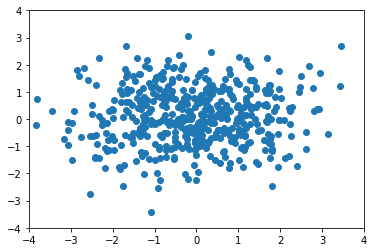

In [3]:
plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.scatter(x1, x2)

Obviously, in the example above, we need to weight y more heavily than x. One way to proceed is to divide each coordinate by the sample standard deviation, Like let $x_1^* = \frac{x_1}{\sqrt{s_{11}}}$ and $x_2^* = \frac{x_2}{\sqrt{s_{22}}}$

Then the points that have a constant squared distance $c^2$ from the origin satisfy
$$\frac{x_1^2}{s_{11}} + \frac{x_2^2}{s_{22}} = c^2$$
And minor and major axes are $[0, 1]$ and $[1, 0]$ with half-length $c\sqrt{s_{22}}$ and $c\sqrt{s_{11}}$ 

Let's derive from special case to general case: Suppose the points center at point $Q(y_1, ...,y^n)$ and a rotated axes $\tilde{x_1}, ..., \tilde{x_n}$, Then the distance between a point P to $Q$ is
$$ d(P, Q) = \sqrt{ \frac{\tilde{(x_1 - y_1)}^2}{\tilde{s_{11}}} + ... +  \frac{\tilde{(x_n - y_n)}^2}{\tilde{s_{nn}}} }$$
Make the coefficient be a's, then it could be written as 
$$d(P, Q) = \sqrt{ a_{11}(x_1 - y_1)^2 + a_{22} (x_2 - y_2)^2 + ... + a_{nn} (x_n - y_n)^2 + 2a_{12}(x_1 - y_1)(x_2 - y_2) + 2a_{13}(x_1 - y_1)(x_3 - y_3) + ... + 2a_{n - 1, n}(x_n - y_n)(x_{n -1} - y_{n - 1})  }$$
It can also be expressed as a quadratic function.

We know that a symmetrix matrix can be written in the form
$$A = \lambda_1 e_1 e_1' + \lambda2 e_2 e_2' + ... + \lambda_k e_k e_k'$$
Then $$x'Ax = \lambda_1 x' e_1 e_1' x + \lambda_2 x' e_2 e_2' x + ... + \lambda_k x' e_k e_k' x$$
Let $y_i = x' e_i = e_i' x$
Then
$$x'Ax = \lambda_1 y_1^2 + ... + \lambda_k y_k^2$$
Recall the $d(P, Q)$, we could say
$$d^2(P, Q) = (\mathbf{x - \mu})' A (\mathbf{x - \mu}) = \lambda_1 y_1^2 + ... +  \lambda_n y_n^2$$
Where $y_i = (\mathbf{x - \mu})' e_i$
In this case, For a ellipse $(\mathbf{x - \mu})' A (\mathbf{x - \mu}) = c^2$, its axes\[i\] is $e_i$ and the corresponding half-length is $\frac{c}{\sqrt(\lambda_i)}$

In [4]:
#just calculate in gray-scale
corner = cv2.imread('dataset/corner.jpg', 0)

In [5]:
# find the derivative of gaussian
cb = cv2.GaussianBlur(corner, (3, 3), 1)
kx, ky = cv2.getDerivKernels(1, 1, 3)

#### Get the gradient of x and y

In [6]:
gx = cv2.filter2D(cb, cv2.CV_32F, kx)
gy = cv2.filter2D(cb, cv2.CV_32F, ky.T)

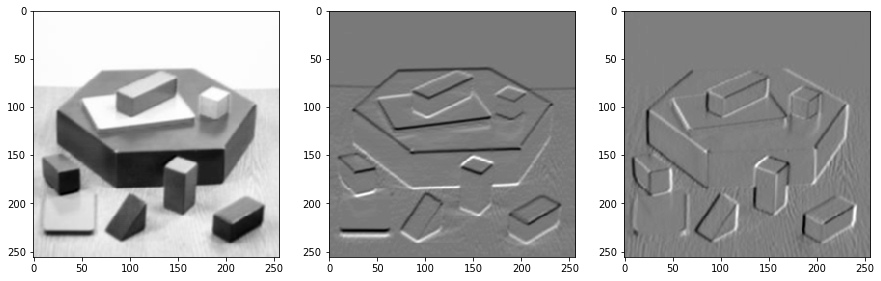

In [7]:
f, axes = plt.subplots(1, 3, figsize = (15, 15))
axes[0].imshow(cb, cmap = 'gray')
axes[1].imshow(gx, cmap = 'gray')
axes[2].imshow(gy, cmap = 'gray')

#### Select Regions

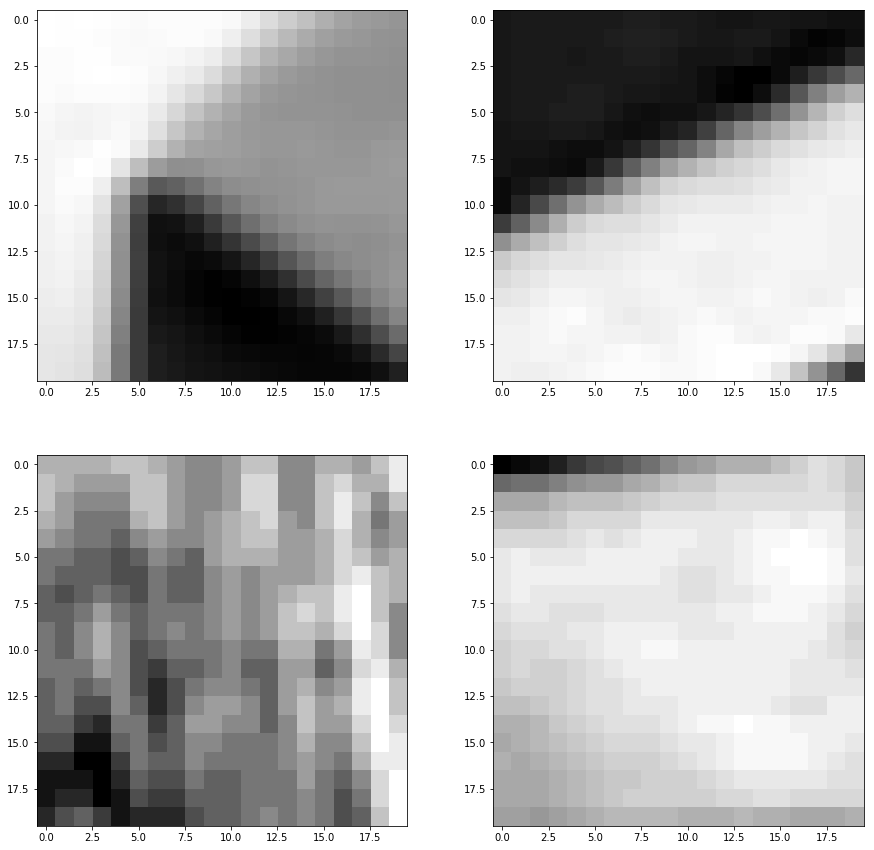

In [8]:
f, axes = plt.subplots(2, 2, figsize = (15, 15))
axes[0][0].imshow(cb[95:115, 20:40], cmap = 'gray')
axes[0][1].imshow(cb[65:85, 100:120], cmap = 'gray')
axes[1][0].imshow(cb[220:240, 150:170], cmap = 'gray')
axes[1][1].imshow(cb[123:143, 150:170], cmap = 'gray')

In [9]:
gx1 = gx[95:115, 20: 40]
gy1 = gy[95:115, 20: 40]

gx2 = gx[65:85, 100:120]
gy2 = gy[65:85, 100:120]

gx3 = gx[220:240, 150:170]
gy3 = gy[220:240, 150:170]

gx4 = gx[123:143, 150:170]
gy4 = gy[123:143, 150:170]

(-25.571684587813625, 30.57168458781362, -7.633388520971302, 5.633388520971302)

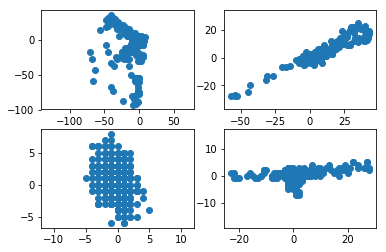

In [10]:
f, axes = plt.subplots(2, 2)
axes[0][0].scatter(gx1.reshape(-1), gy1.reshape(-1))
axes[0][0].axis('equal')
axes[0][1].scatter(gx2.reshape(-1), gy2.reshape(-1))
axes[0][1].axis('equal')
axes[1][0].scatter(gx3.reshape(-1), gy3.reshape(-1))
axes[1][0].axis('equal')
axes[1][1].scatter(gx4.reshape(-1), gy4.reshape(-1))
axes[1][1].axis('equal')

#### Centralize

In [11]:
#substract the mean, make it as a vector
gx1 = (gx1 - np.mean(gx1)).reshape(-1)
gx2 = (gx2 - np.mean(gx2)).reshape(-1)
gx3 = (gx3 - np.mean(gx3)).reshape(-1)
gx4 = (gx4 - np.mean(gx4)).reshape(-1)

gy1 = (gy1 - np.mean(gy1)).reshape(-1)
gy2 = (gy2 - np.mean(gy2)).reshape(-1)
gy3 = (gy3 - np.mean(gy3)).reshape(-1)
gy4 = (gy4 - np.mean(gy4)).reshape(-1)

#### Covariance Supported in Numpy
- `numpy.cov(m, y=None, rowvar=True, bias=False, ddof=None, fweights=None, aweights=None)`

In [12]:
#calculate the covariance
H1 = np.cov((gx1, gy1))
H2 = np.cov((gx2, gy2))
H3 = np.cov((gx3, gy3))
H4 = np.cov((gx4, gy4))

#### Error Function
Recall the Second order Approx
$$f(x + u, y + v) \approx f(x, y) + uf_x(x, y) + vf_y(x, y) + \frac{1}{2}(u^2f_{xx}(x, y) + 2uvf_{xy}(x, y) + v^2f_{yy}(x, y))$$
And the First order Approx
$$f(x + u, y + v) \approx f(x, y) + uf_x(x, y) + vf_y(x, y)$$
Then the Error function
$$\begin{equation}\begin{split}
E(u, v) & = \sum_{x, y} w(x, y)[ I(x + u, y + v) - I(x, y)]^2 \\
& = \sum_{x, y} w(x, y) [I(x, y) + uf_x(x, y) + vf_y(x, y) - I(x, y)]^2 \\
& = \sum_{x, y} w(x, y) [u^2I_x^2 + v^2I_y^2 + 2uvI_{xy}] \\
& = [u \quad v] \sum_{x, y} w(x, y)\,  \begin{bmatrix} I_{xx} & I_{xy} \\ I_{xy} & I_{yy} \end{bmatrix} \begin{bmatrix} u \\ v \end{bmatrix}
\end{split}\end{equation}$$

In [13]:
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

In [18]:
def get_error_function(size, H, w = lambda x, y: 1):
    l = size // 2
    y, x = np.meshgrid(np.arange(-l, l + 1), np.arange(-l, l + 1))
    points = np.c_[np.ravel(y), np.ravel(x)]
    return y, x, ((np.dstack((x, y)) @ H).reshape(-1, 1, 2) @ np.dstack((x, y)).reshape(-1, 2, 1)).reshape(size, size)

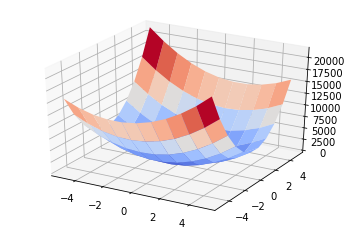

In [19]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
y, x, z = get_error_function(11 , H1)
ax.plot_surface(x, y, z, cmap  = cm.coolwarm)

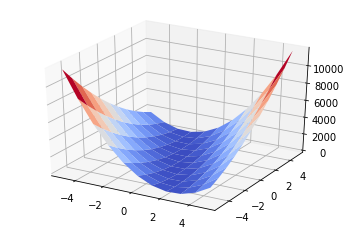

In [20]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
y, x, z = get_error_function(11 , H2)
ax.plot_surface(x, y, z, cmap  = cm.coolwarm)

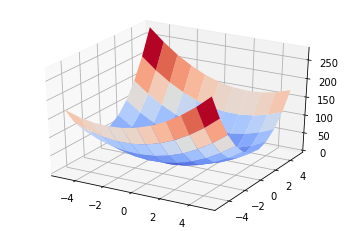

In [21]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
y, x, z = get_error_function(11 , H3)
ax.plot_surface(x, y, z, cmap  = cm.coolwarm)

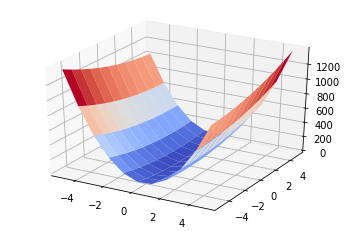

In [22]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
y, x, z = get_error_function(11 , H4)
ax.plot_surface(x, y, z, cmap  = cm.coolwarm)

#### Threshold on Eigenvalues to detect corners
1. $R = min(\lambda_1, \lambda_2)$
2. $R = det(M) - k(trace(M))^2$ where k is an empirically determined constant: k = 0.04 - 0.06
3. $R = \frac{det(M)}{trace(M) + \epsilon}$

![harris corner](dataset/eigenvalueinhc.jpg)

http://www.cs.cmu.edu/~16385/s18/lectures/lecture5.pdf

http://www.cse.psu.edu/~rtc12/CSE486/lecture06.pdf

https://docs.opencv.org/3.4/dc/d0d/tutorial_py_features_harris.html

!!!!!implementation!!!!##TODO